In [1]:
# Classifying bearings with a Convolutional Neural Network using TensorFlow, CV2

'''
These are the steps need to follow while writing Tensorflow:

Step 1) Import the data
Step 2) Transform the data
Step 3) Construct the tensor
Step 4) Build the model
Step 5) Train and evaluate the model
Step 6) Improve the mode

-install OpenCV for first time

-Import all libraries as below

-Imporn Numpy. If it is first time, we can pip install

-Import os and matplotlib

-progress bars to Python code is with tqdm. Install it and import.

'''

import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os 
from random import shuffle
import cv2
%matplotlib inline

In [2]:
cwd = os.getcwd()
cwd
os.chdir("E:/IIM/TensorFlow/warranty/Bearings/")
cwd

'C:\\Users\\Eshwar'

In [3]:
'''
TensorFlow Fold makes it easy to implement deep-learning models that operate over data of varying size and structure

Firsr, change the working directory where we have the images for input.

1. create image folders for test and train.
2. If not in the desired, change/set the working directory to that path as below where the image files exists.
'''

os.chdir("E:/IIM/TensorFlow/warranty/Bearings/")
cwd

'C:\\Users\\Eshwar'

In [4]:
'''
Set Path to test directory
Set path to train directory
'''

TEST_DIR = "E:/IIM/TensorFlow/warranty/Bearings/test"
TRAIN_DIR = "E:/IIM/TensorFlow/warranty/Bearings/train"

In [5]:
'''
set image size to 50
LR - Learning rate is a hyper-parameter that 
     controls how much we are adjusting the weights of our network with respect the loss gradient.
     le-3 = 0.001 ( 1 x 10 ^ -3 )
     
      learning_rate =[0.1, 0.01, 0.001, 0.0001]
'''

IMG_SIZE = 50
LR = 0.001


In [6]:
'''
just so we remember which saved model is which, sizes must match

'''
MODEL_NAME = 'BearingClass5-{}-{}.model'.format(LR, '2conv-basic')


In [7]:
'''
define the classification label to convert the lable into one-hot array as below
'''

def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [gud,bad]
    #                            [much gud, no bad]
    if word_label == 'gud': return [1,0]
    #                             [no gud, very bad]
    elif word_label == 'bad': return [0,1]

In [8]:
'''
Create training data and save it in train_data.npy in the working directory.
Convert the image as gray scale image
This data can be used in the subsequent steps as needed

'''

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [9]:
'''
Create test data and save it in train_data.npy in the working directory.
Convert the image as gray scale image
This data can be used in the subsequent steps as needed

'''
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [10]:
train_data = create_train_data()
# If we have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 478/478 [00:00<00:00, 637.54it/s]


In [11]:
'''
Next, we're ready to define our neural network:

TFlearn is a modular and transparent deep learning library built on top of Tensorflow. 
It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, 
while remaining fully transparent and compatible with it.

The most common type of convolution that is used is the 2D convolution layer, and is usually abbreviated as conv2D. 
A filter or a kernel in a conv2D layer has a height and a width.

Max pooling layer for 2D inputs (e.g. images).

Drop-Out is regularization techniques.

fully_connected creates a variable called weights, representing a fully connected weight matrix, 
which is multiplied by the inputs to produce a Tensor of hidden units.

'''

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


W0801 23:30:39.898350 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\helpers\summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0801 23:30:39.901053 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\helpers\trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0801 23:30:39.912842 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0801 23:30:39.917731 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0801 23:30:39.929397 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\t

In [12]:
'''
ImagePreprocessing - Decode and preprocess one image for evaluation or training
ImageAugmentation - Create extra synthetic training data by flipping & rotating images

'''

from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

In [13]:
# normalisation of images
# The aim of pre-processing is an improvement of the image data that suppresses unwanted distortions or 
# enhances some image features important for further processing
img_prep = ImagePreprocessing()

img_prep.add_featurewise_zero_center()  
# Zero center every sample with specified mean. If not specified, the mean is evaluated over all samples.

img_prep.add_featurewise_stdnorm()
#Scale each sample by the specified standard deviation. If no std specified, std is evaluated over all samples data.

# Create extra synthetic training data by flipping & rotating images
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_90degrees_rotation(rotations=[0, 1, 2, 3])
img_aug.add_random_blur (sigma_max=5.0)

In [14]:
#convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input',data_preprocessing=img_prep, data_augmentation=img_aug)
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

W0801 23:30:39.994268 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\layers\core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [15]:
'''
Check Python version as below. This will give we the exact version of python running our script.
Tensorflow runs when python version > 3.5
Current verion - 3.7.3

'''

from platform import python_version
print("Current python version is: ",(python_version()))

Current python version is:  3.7.3


In [16]:

import tensorflow as tf
tf.reset_default_graph()

In [17]:
'''
Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks.
CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which 
the model can then use for classification. CNNs contains three components:

1.Convolutional layers, which apply a specified number of convolution filters to the image.
2.Pooling layers, which downsample the image data extracted by the convolutional layers to reduce the dimensionality of the 
  feature map in order to decrease processing time.
3.Dense (fully connected) layers, which perform classification on the features extracted by the convolutional layers and
  downsampled by the pooling layers. In a dense layer, every node in the layer is connected to every node in the 
  preceding layer.

Activation function: It is used to determine the output of neural network like yes or no. It maps the resulting values 
in between 0 to 1 or -1 to 1 etc.

relu    - ReLU (Rectified Linear Unit) Activation Function. Any negative input given to the ReLU activation function 
          turns the value into zero
softmax - The softmax function is a more generalized logistic activation function which is used for multiclass classification.

convnet - A specific kind of such a deep neural network is the convolutional network, 
          which is commonly referred to as CNN or ConvNet
          
optimizer - adam = Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent 
            procedure to update network weights iterative based in training data.

loss - used to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.

binary_crossentropy - used for binary classification
categorical_crossentropy - used for multiple classification.

Dropout - is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

'''
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

W0801 23:30:42.465062 18028 deprecation.py:506] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\initializations.py:119: calling UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 23:30:42.466109 18028 deprecation.py:323] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:507: UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
W0801 23:30:42.484386 18028 deprecation_wrapper.py:119] From C:\Users\Eshwar\Anaconda3\lib\site-packages\tflearn\layers\conv.py:552: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 23:30:42.5

In [18]:
#model = tflearn.DNN(convnet, tensorboard_dir='log')
# What we have here is a nice, 2 layered convolutional neural network, with a fully connected layer, 
# and then the output layer. It's been debated whether or not a fully connected layer is of any use.  

In [19]:
# This exact convnet was good enough for recognizing hand 28x28 written digits. 
# Let's see how it does with goodd and bad/damaged bearings at 50x50 resolution.

In [20]:
# Now, it wont always be the case that we're training the network fresh every time. 
# Maybe first we just want to see how 3 epochs trains, but then, after 3, maybe we're done, 
# or maybe we want to see about 5 epochs. We want to be saving our model after every session, and reloading it
# if we have a saved version:

In [21]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [22]:
#Now, let's split out training and testing data:

train = train_data[:-100]
test = train_data[-100:]

Now, the training data and testing data are both labeled datasets. The training data is what we'll fit the neural network with, and the test data is what we're going to use to validate the results. The test data will be "out of sample," meaning the testing data will only be used to test the accuracy of the network, not to train it.

We also have "test" images that we downloaded. THOSE images are not labeled at all, and those are what we'll submit to Kaggle for the competition.

Next, we're going to create our data arrays. For some reason, typical numpy logic like:

array[:,0] and array[:,1] did NOT work for me here. Not sure what I'm doing wrong, so I do this instead to separate my features and labels:

In [23]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

In [24]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [28]:
# Now we fit for 50 epochs:

model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=600, show_metric=True, run_id=MODEL_NAME)

Training Step: 659  | total loss: 0.15157 | time: 0.521s
| Adam | epoch: 110 | loss: 0.15157 - acc: 0.9698 -- iter: 320/378
Training Step: 660  | total loss: 0.13747 | time: 1.650s
| Adam | epoch: 110 | loss: 0.13747 - acc: 0.9728 | val_loss: 0.19839 - val_acc: 0.9500 -- iter: 378/378
--


### accuracy computed on the validation set - 95%

### Accuracy of a batch of training data    - 97% 

100%|██████████| 28/28 [00:00<00:00, 1063.58it/s]


num: 0
data: [array([[ 75,  81,  84, ...,  94,  95,  96],
       [ 77,  80,  84, ...,  95,  93,  95],
       [ 77,  80,  86, ...,  94,  95,  97],
       ...,
       [ 89,  90,  99, ..., 110, 116, 148],
       [ 90,  89,  95, ..., 107, 116, 154],
       [ 85,  89,  92, ..., 107, 114, 153]], dtype=uint8), '11']
num: 1
data: [array([[156, 165, 169, ..., 151, 151, 145],
       [178, 184, 183, ..., 150, 150, 145],
       [196, 193, 187, ..., 152, 150, 148],
       ...,
       [214, 211, 208, ..., 139, 128, 121],
       [215, 207, 205, ..., 139, 131, 121],
       [214, 210, 203, ..., 136, 130, 122]], dtype=uint8), '5']
num: 2
data: [array([[174, 177, 175, ..., 199, 206, 217],
       [174, 177, 174, ..., 196, 195, 210],
       [176, 177, 174, ..., 191, 194, 204],
       ...,
       [235, 232, 226, ..., 229, 246, 243],
       [233, 234, 230, ..., 225, 236, 235],
       [232, 239, 230, ..., 234, 236, 238]], dtype=uint8), '4']
num: 3
data: [array([[218, 191, 225, ..., 202, 224, 193],
       [228

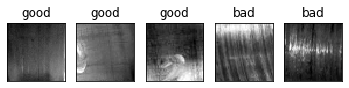

In [30]:
import matplotlib.pyplot as plt

# if we need to create the data:
test_data = process_test_data()
# if we already have some saved: Yes, saved in below fplder
#test_data = np.load('C:/User/Eshwar/test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:5]):
    # gud: [1,0]
    # bad: [0,1]
    print('num:', num)
    print('data:', data)
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(1,5,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='bad'
    else: str_label='good'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [31]:
with open('BearingClassifier005.csv','w') as f:
    f.write('Image ID,Label\n')
            
with open('BearingClassifier005.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        if np.argmax(model_out) == 1: str_label='bad surface'
        else: str_label='good bearing'
        f.write('{},{}\n'.format(img_num,str_label,model_out[1]))

100%|██████████| 28/28 [00:00<00:00, 525.73it/s]


In [32]:
with open('BearingClassifier005.csv','w') as f:
    f.write('Image ID,Model Output\n')
            
with open('BearingClassifier005.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        str_label = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 28/28 [00:00<00:00, 432.84it/s]


In [33]:
#100%|██████████| 8/8 [00:00<00:00, 306.44it/s]

In [34]:
import os
cwd = os.getcwd()
cwd

'E:\\IIM\\TensorFlow\\warranty\\Bearings'